# **Proyecto 01 – Evaluación del primer trimestre**  
El objeto de este proyecto es poner en práctica los conocimientos adquiridos durante este primer trimestre y defenderlo en una exposición con el profesor de manera oral. El dataset utilizado permitirá resolver un problema de regresión o de clasificación, ha de ser de tu elección y propuesto al profesor, para considerar si es no adecuado para el esfuerzo
estimado de este proyecto.
En el proyecto se han de incluir los siguientes apartados:

# 1. (0,5 Puntos) Explicación del problema y del dataset a utilizar.

El problema a resolver va a ser un problema de regresión de averiguar cuantos kilómetros puede recorrer un coche por galón de gasolina, lo que es interesante para los clientes que vayan a casas de automóviles en busca de un coche puedan saber el rendimiento del coche solamente a través de sus características como pueden ser el peso del coche, cilíndros, aceleración,...

Luego el dataset a utilizar va a ser extraido por del github de la librería de seaborn, cuyo nombre es mpg.csv.

Para ello vamos a tener que primero ver representar el csv y a partir de ahí realizar una matriz de correlación y ver cuáles son las columnas que vamos a utilizar para nuestro modelo.

Tras saber dichas columnas, habría que empezar a calcular variables interesantes cómo media, desviación estándar,etc.

Finalmente, empezamos a entrenar modelos y ver cuál es el más adecuado para nuestro problema y hacer predicciones para ver el resutado que podemos obtener.




## 2. (0,5 Puntos) Importación del dataset.

In [ ]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
car_df = sb.load_dataset("mpg")
car_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# 3. (1 Punto) Revisar los datos y considerar el aplicar escalamiento de datos, conversión de variables categóricas a numéricas, etc…


In [ ]:
# Se realiza una limpieza de datos con valores nulos y pasamos las variables categóricas a 
# numéricas de la columna origen
car_df = car_df.dropna()
car_df['origin'].replace(['usa', 'europe', 'japan'],[0, 1, 2], inplace=True)
car_df

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,0,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,0,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,0,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,0,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,1,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,0,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,0,ford ranger


In [ ]:
# mostrar variables del dataframe como la media,el valor mínimo, el máximo, la desviación estándar,....
car_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,2.000000


# 4. (1 Punto) Realizar una selección de aquellas características que consideres mejores para el entrenamiento del modelo. Indicar las herramientas (matriz de correlación, pairplot, etc…) utilizada para seleccionar las variables/características y argumentar los criterios/el criterio en las selección de las variables y características.

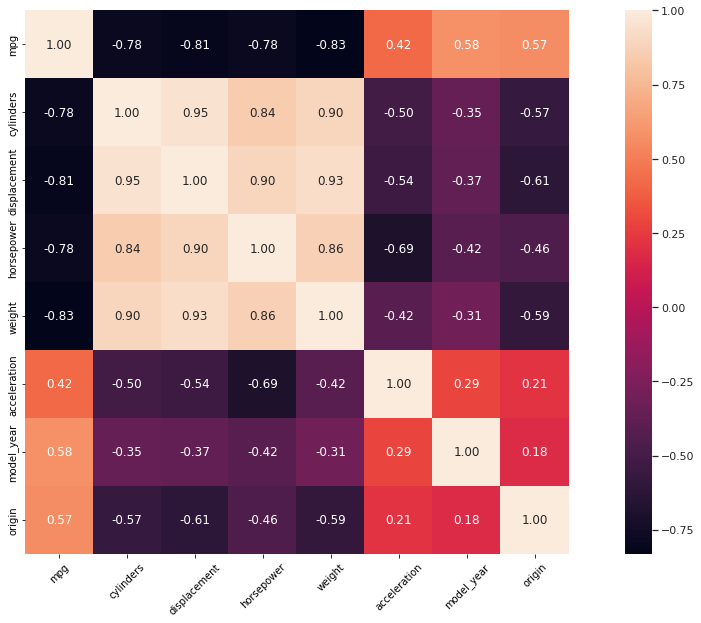

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
sb.set()
sb.heatmap(car_df.corr(), square=True, annot=True, fmt=".2f")
ax.set_xticklabels(labels= car_df.columns.values, rotation = 45,
                   horizontalalignment='center')
plt.show()

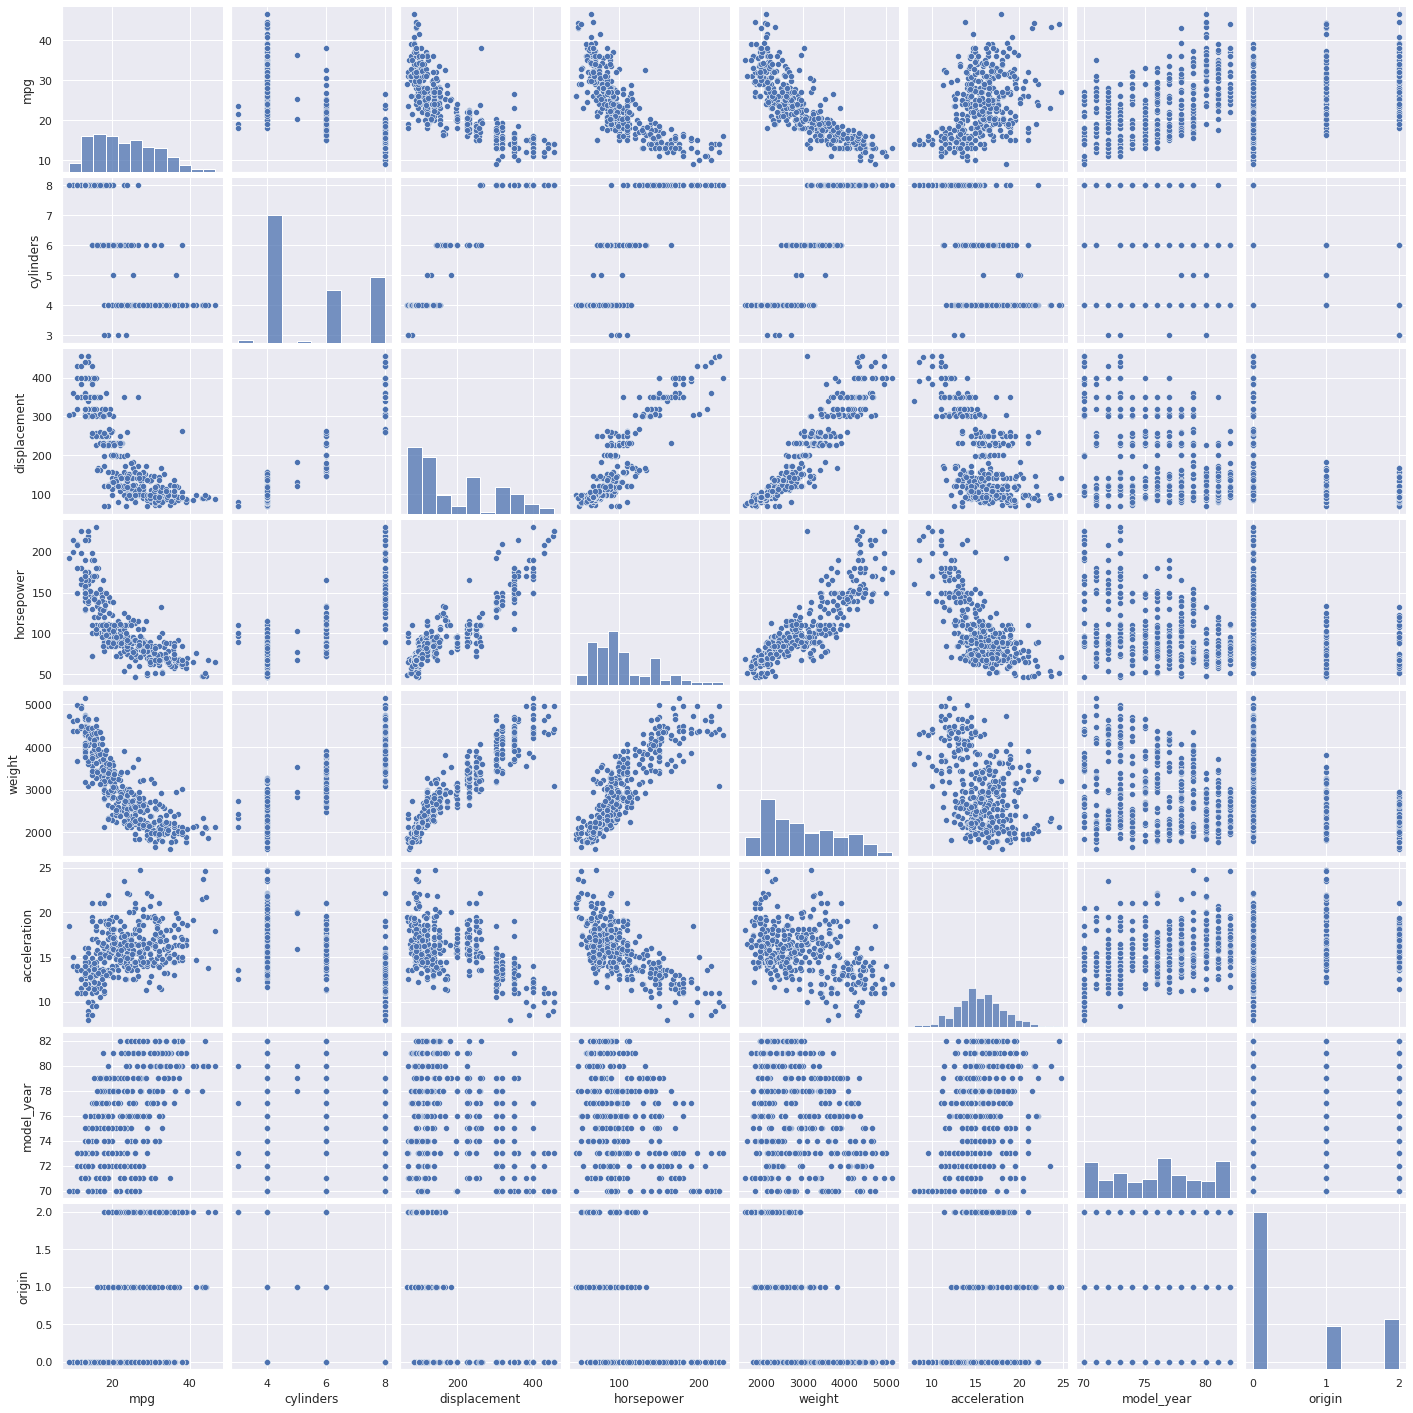

In [ ]:
sb.pairplot(car_df)

Vemos finalmente como las variables del peso,la carrocería, millas por galón, cilíndrada y caballos de motor tienen una alta correlación debido a que cada una de ellas depende de la otra.
Finalmente, nuestra y_mpg va a ser la variable de millas por galón,la cuál vamos a calcular para saber el rendimiento del coche.

# 5. (2 Puntos) Utilizar y comparar al menos dos modelos diferentes (De NaiveBayes sólo escoger uno), para elegir aquel que consideres adecuado en la resolución del problema. Recoger en la memoria los parámetros utilizados y el criterio de calidad (por ejemplo la precisión, MAE, etc…) que has decido utilizar para escoger un modelo. Es fundamental/obligado el aplicar la técnica de la validación cruzada (Cross validation).

**Separación de datos**

In [ ]:
from sklearn.model_selection import train_test_split
#pasamos datos de entrada y salida, además de eliminar la columna de nombres de coches del csv.

x_mpg = car_df.drop(['mpg','name',], axis=1)
y_mpg = car_df['mpg'].astype('int')
# separamos train y test 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_mpg, y_mpg, test_size=0.3, random_state=2)

**Modelos Naive Bayes Sin Cross Validation**

No uso el modelo categorical ya que da error si no pasas todos los datos a enteros, en éste caso necesito que los datos estén en decimales por tanto no calcularé la precisión de ese modelo.

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB,CategoricalNB

# 2. preparamos 2 arrays, uno con los nombres y otro con las instancias de los modelos de naive bayes
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB',]
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]

# 3.recorremos con el bucle ambos arrays y creara otro con los resultados después de entrenarlos en este caso cfl
for name, clf in zip(names, classifiers):
  
  # entrenamos el modelo
  clf.fit(Xtrain, Ytrain)

  # hacemos una predicción y a partir de ella obtenemos la precisión de cada uno de los modelos
  score = clf.score(Xtest, Ytest) #Returns the mean accuracy on the given test data and labels.
  print ("Modelo: %s = %6.2f" % (name, score))

Modelo: GaussianNB =   0.09
Modelo: MultiNomialNB =   0.12
Modelo: BernouilliNB =   0.04
Modelo: ComplementNB =   0.05


**Modelos de Naive Bayes con Cross Validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
cv = KFold(n_splits = 9, shuffle = True) # shuffle = False si hay dimensión temporal 
total_scores = []
for name, clf in zip(names, classifiers):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(Xtrain):
    # División train test aleatoria
    f_train_x = Xtrain.iloc[train_fold]           # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_y = Ytrain.iloc[train_fold]
    # entrenamiento y ejeución del modelo
    clf.fit(f_train_x, f_train_y)
    # Realizamos la predicción (Final evaluation) y guardamos la precisión para calcular la media posteriormente
    y_pred = clf.predict(Xtrain.iloc[test_fold])
    # evaluación del modelo
    acc = accuracy_score(Ytrain.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo: %s = %6.2f" % (names[i], total_scores[i]))


Modelo: GaussianNB =   0.14
Modelo: MultiNomialNB =   0.11
Modelo: BernouilliNB =   0.05
Modelo: ComplementNB =   0.07


**Modelo KNN**

Visto que nuestro problema es de regresión vamos a usar solo el modelo Regressor de KNN usando los parámetros K (vecinos) y w (pesos).
En este caso uso el peso distance debido a que la precisión del modelo es mayor que la uniforme.

Primero calculamos los vecinos de cada una de los pesos.

Min Value uniform : 2.6687211093990753 (11)
Min Value distance : 2.6454790525274947 (28)


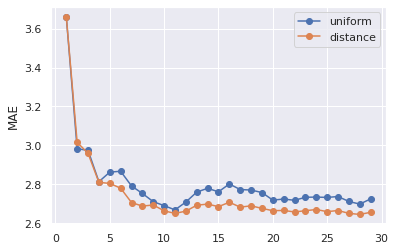

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = TimeSeriesSplit(n_splits = 5) #
Xtrain.reset_index(drop = True, inplace = True) # reinicia índice

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(Xtrain):
          # División train test aleatoria
          f_train = Xtrain.loc[train_fold]
          f_test = Xtrain.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit(Xtrain,Ytrain)
          y_pred_cv = knn.predict(Xtest)
          # evaluación del modelo
          mae = mean_absolute_error(Ytest, y_pred_cv)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')     

plt.legend()
plt.show() 



In [ ]:
# 1. elegir regresor
from sklearn.neighbors import KNeighborsRegressor # Se utiliza este método porque es un problema de regresión

#Parámetros
k = 11 # Kneighbours o vecinos
w = "uniform" # elijo uniform porque al recorrer lo vecinos más cercano devuelve mayor precisión

# 2. instanciar el modelo
knn_model = KNeighborsRegressor(k, weights=w)
# 3. entrenamiento con los datos
knn_model.fit(Xtrain , Ytrain)
# 4. predicción con nuevos datos y precisión
accuracy = knn_model.score(Xtest,Ytest)
accuracy

0.7443526591721349

**Modelo KNN con Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

#params
k = 11
w = "uniform" 

# 2. instanciar el modelo
knn_model_CV = KNeighborsRegressor(k, weights=w)
# 3. entrenamiento con los datos
knn_model_CV.fit(Xtrain , Ytrain)
# 4. predicción con nuevos datos y precisión
scores = cross_val_score(knn_model_CV,Xtrain,Ytrain)
#para obtener la mayor precisión
scores.mean()

0.7131261982496411

Me quedo con el modelo KNN ya que como ppodemos observar los modelos de naive bayes dan una precisión muy baja en cambio el modelo de regresión de KNN muestra una precisión mayor, debido a que es capaz de calcular las millas por galon que puede hacer regresivamente.

# 6. Una vez decides el modelo que consideras mejor, entonces realizar las siguientes tareas:





a. (0,75 Puntos) Entrenarlo y obtener la matriz de confusión.

In [ ]:
#entreno el modelo
knn_model_CV.fit(Xtrain,Ytrain)
# realizo una predicción
y_pred = knn_model_CV.predict(Xtest)


In [ ]:
#calculo su precisión
knn_model_CV.score(Xtest,Ytest)

0.7443526591721349

**Matriz de confusión**

Text(0, 0.5, 'Predicted mpg')

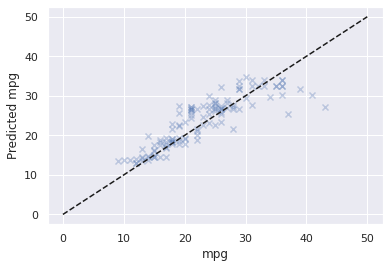

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Ytest, y_pred , alpha = 0.3, marker = 'x')
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("mpg")
plt.ylabel("Predicted mpg")

Vemos la regresión de las millas por galones predecidas.

**Calcular el MAE**

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Ytest,y_pred)

2.6687211093990753

**Calcular el MSE**

In [ ]:
from sklearn import metrics 

metrics.mean_squared_error(Ytest,y_pred)

13.458187421207452

**MAPE**

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(Ytest, y_pred)

0.11955445965961414

b. (0,75 Puntos) Exportar a un fichero los parámetros del modelo entrenado.

In [ ]:
#exportamos el modelo 
import sklearn.externals
import joblib
joblib.dump(knn_model_CV,'Modelo_entrenado_distancia_de_coches.pkl')

['Modelo_entrenado_distancia_de_coches.pkl']

c. (0,75 Puntos) Importar los parámetros del modelo.

In [ ]:
#importamos el modelo
k=11
w="uniform"

model_imported = KNeighborsRegressor(k, weights=w)
model_imported =  joblib.load('Modelo_entrenado_distancia_de_coches.pkl')
model_imported.score(Xtest,Ytest)

0.7443526591721349

d. (0,75 Puntos) Aplicar el modelo (predict) a todos los datos del dataset y
obtener la matriz de confusión.


Text(0, 0.5, 'Predicted mpg')

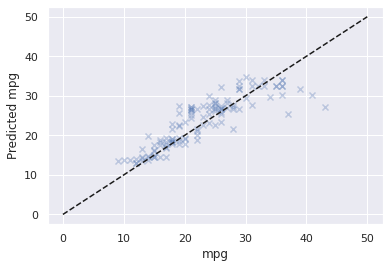

In [ ]:
y_pred_import = model_imported.predict(Xtest)

plt.scatter(Ytest, y_pred_import , alpha = 0.3, marker = 'x')
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("mpg")
plt.ylabel("Predicted mpg")